In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('dataset/50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:
#to check whether null value contains or not
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [25]:
features = df.loc[:,'R&D Spend':'State']
features

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [26]:
profit = df.iloc[:,-1].values
profit

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

c:\users\arunb\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


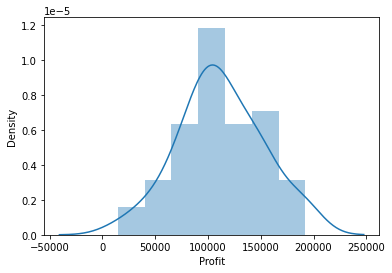

In [27]:
#im goint to see aveg salary by using distplot
import seaborn as sns
sns.distplot(df.iloc[:,-1])
plt.show()

#i can observe that avg profit

In [28]:
features.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [29]:
#here in state column i have categorical data(3) so have to encode it using lable  encoder
df['State'].unique()  #3 unique datas

array(['New York', 'California', 'Florida'], dtype=object)

In [30]:
#Encoding categorical data
#transfomr the column with labelencoder and leave other columns as it is
#syntax: ColumnTransformer([(tuple with 3 elements)],remainder="")
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')  #passthrough just replace this values
encoded_features = ct.fit_transform(features)


In [31]:
print(encoded_features)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.4437241e+05 1.1867185e+05
  3.8319962e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.4210734e+05 9.1391770e+04
  3.6616842e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3187690e+05 9.9814710e+04
  3.6286136e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.3461546e+05 1.4719887e+05
  1.2771682e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.3029813e+05 1.4553006e+05
  3.2387668e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.2054252e+05 1.4871895e+05
  3.1161329e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2333488e+05 1.0867917e+05
  3.0498162e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0191308e+05 1.1059411e+05
  2.2916095e+05]
 [1.0000000e+00 0.000

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(encoded_features,profit,test_size=0.2,random_state=584)

In [35]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [36]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(40, 6) (40,) (10, 6) (10,)


In [37]:
regression.coef_

array([ 4.04342385e+02, -8.50379894e+02,  4.46037509e+02,  8.38947725e-01,
       -4.30346933e-02,  2.31597847e-02])

In [38]:
y_pred = regression.predict(X_test)

In [40]:
actVspred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [41]:
actVspred.head(5)

,Actual,Predicted
0,152211.77,151525.091979
1,141585.52,127336.793009
2,96479.51,89282.507944
3,124266.90,127172.482041
4,144259.40,135830.062704


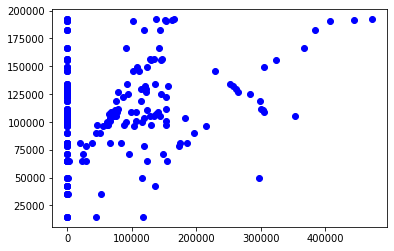

In [54]:
# plt.plot(X_train, regression.predict(X_train), color = 'blue')
plt.plot(X_train,y_train,'bo')

<AxesSubplot:>

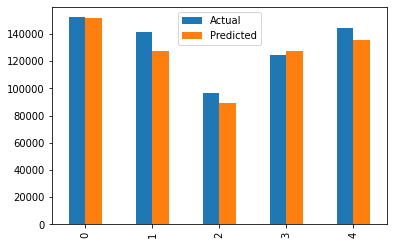

In [57]:
actVspred.head(5).plot(kind="bar")

In [43]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8790.116840960767
Mean Squared Error: 103474053.34461908
Root Mean Squared Error: 10172.219686214956


In [55]:
regression.score(X_train,y_train)

0.9562402667943557